In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets ,model_selection ,preprocessing ,linear_model ,metrics ,tree ,ensemble ,svm

In [3]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
x.shape,y.shape

((569, 30), (569,))

In [19]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x.shape,y.shape

((150, 4), (150,))

In [20]:
x_scaler = preprocessing.StandardScaler()
x_norm = x_scaler.fit_transform(x)

x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.099,random_state=42,stratify=y)


In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++',n_clusters= 5)
clusters = kmeans.fit_predict(x_norm)

c:\Users\Electronica Care\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Electronica Care\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


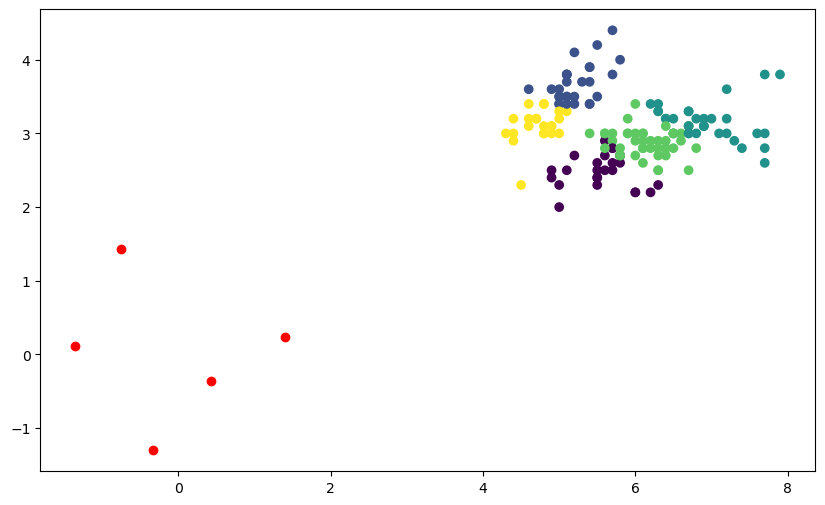

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=clusters,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()

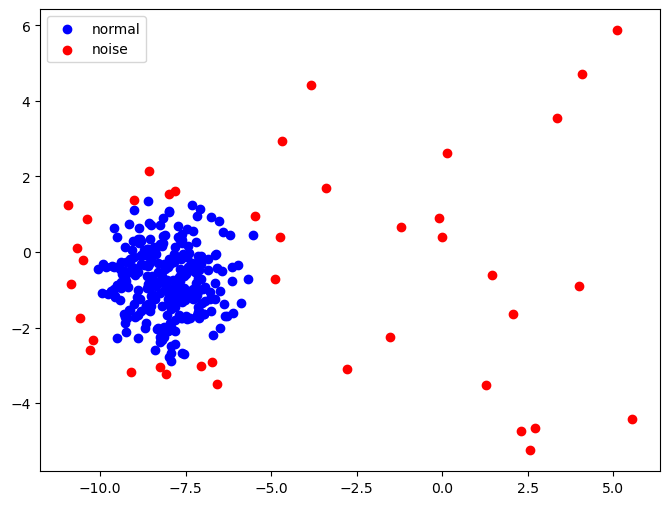

In [24]:
x ,_ = datasets.make_blobs(n_samples=300, centers=1,)
x_noise = np.random.uniform(low=-6,high=6,size=(20,2))
x=np.vstack([x,x_noise])

model = ensemble.IsolationForest(random_state=42)
model.fit(x)
pred = model.predict(x)

noise = x[pred == -1]
normal = x[pred == 1]

plt.figure(figsize=(8,6))
plt.scatter(normal[:,0],normal[:,1],c='blue',label='normal')
plt.scatter(noise[:,0],noise[:,1],c='red',label='noise')

plt.legend()
plt.show()

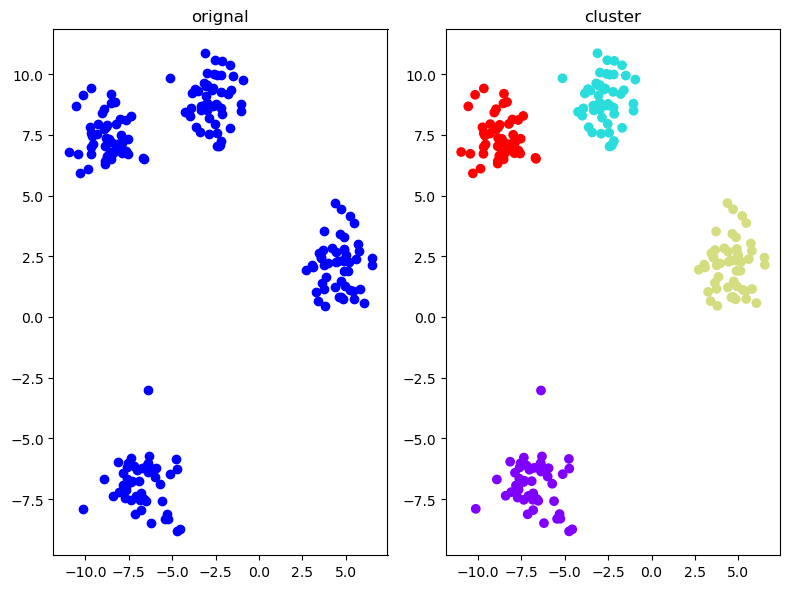

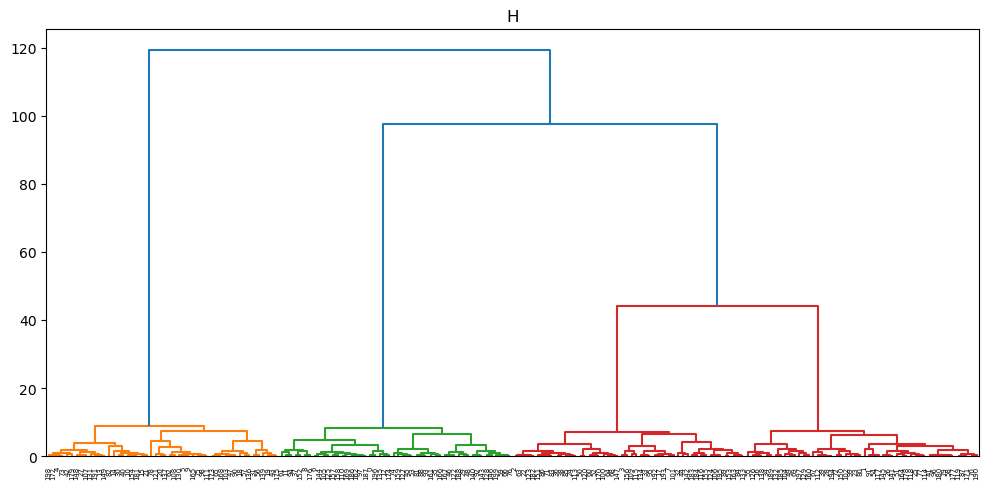

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram ,linkage

x,y = datasets.make_blobs(n_samples=200, centers=4,cluster_std=1,random_state=42)

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c='blue')
plt.title("orignal")

hc = AgglomerativeClustering(n_clusters=4,metric='euclidean')
y_hc = hc.fit_predict(x)

plt.subplot(1,2,2)
plt.scatter(x[:,0],x[:,1],c=y_hc ,cmap='rainbow')
plt.title("cluster")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.title('H')
z = linkage(x,method='ward')
dendrogram(z)
plt.tight_layout()

plt.show()



In [47]:
data = pd.read_csv("student_unsupervied.csv")
features = data [['Age','GPA','Study_Hours','Attendance']]
kmeans = KMeans(n_clusters=3,random_state=42)
data['Cluster'] = kmeans.fit_predict(features)
data.head(10)

c:\Users\Electronica Care\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Electronica Care\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Student_ID,Age,GPA,Study_Hours,Attendance,Cluster
0,1,21.0,2.79,33.6,86.7,2
1,2,20.0,3.29,35.6,89.4,2
2,3,21.0,3.33,40.8,102.5,1
3,4,23.0,2.60,30.5,91.1,2
4,5,20.0,2.92,6.2,84.8,0
5,6,20.0,3.20,10.6,86.2,0
6,7,23.0,3.94,25.2,97.8,1
7,8,22.0,3.09,25.1,79.1,2
8,9,19.0,3.13,25.2,90.5,2
9,10,21.0,2.96,50.0,83.0,2


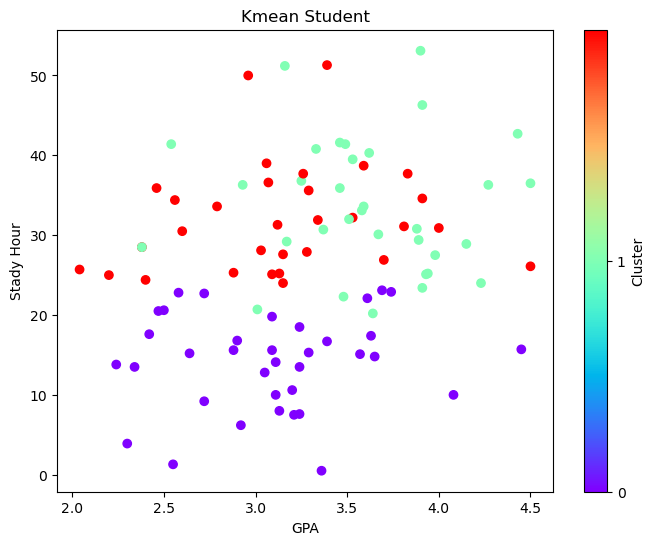

In [48]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(data['GPA'],data['Study_Hours'],c=data['Cluster'],cmap='rainbow')
plt.xlabel('GPA')
plt.ylabel('Stady Hour')
plt.title('Kmean Student')
plt.colorbar(scatter,label='Cluster',ticks=[0,1,])
plt.show()

In [49]:
print(data['Cluster'].value_counts())

Cluster
0    36
1    33
2    31
Name: count, dtype: int64


In [50]:
from sklearn.ensemble import IsolationForest

isoF = IsolationForest(random_state=42)
data['Anomely']=isoF.fit_predict(features)
print(data['Anomely'].value_counts())
print(data[data['Anomely']==-1])

Anomely
 1    77
-1    23
Name: count, dtype: int64
    Student_ID   Age   GPA  Study_Hours  Attendance  Cluster  Anomely
9           10  21.0  2.96         50.0        83.0        2       -1
10          11  19.0  2.04         25.7        82.8        2       -1
13          14  18.0  4.50         36.5       103.1        1       -1
20          21  23.0  3.90         53.1        96.0        1       -1
21          22  20.0  2.55          1.3        91.0        0       -1
23          24  18.0  2.30          3.9       100.0        0       -1
25          26  20.0  4.00         30.9        72.9        2       -1
31          32  24.0  3.53         32.2        86.0        2       -1
34          35  22.0  2.54         41.4        94.8        1       -1
47          48  22.0  2.34         13.5        70.9        0       -1
52          53  19.0  3.16         51.2       103.6        1       -1
56          57  18.0  4.43         42.7        94.8        1       -1
62          63  18.0  4.08         10.

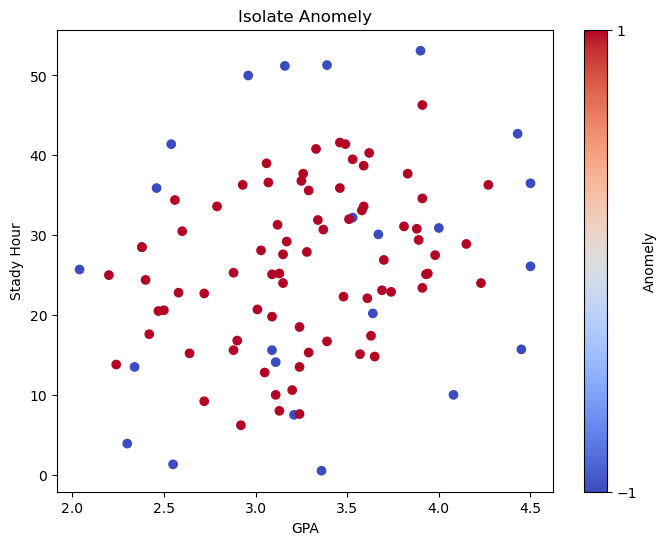

In [51]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(data['GPA'],data['Study_Hours'],c=data['Anomely'],cmap='coolwarm')
plt.xlabel('GPA')
plt.ylabel('Stady Hour')
plt.title('Isolate Anomely')
plt.colorbar(scatter,label='Anomely',ticks=[-1,1,])
plt.show()